In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import os
import glob
#import shutil

import xarray as xr
import numpy as np
#from pyhomogenize import open_xrdataset
#import seaborn as sns
#
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
from plotting_tools_africa import savefig, directory_available, plot_4diff

In [7]:
home=os.getcwd()
# The data is quite large, therefore I use my work
database='/work/ch0636/g300047/cicles/'
# set directories
datadir=database +'/climate_fact_data/results'
plotdir=database+'/horizontal-plots-diff-robust'

In [8]:
directory_available(plotdir)

In [9]:
# This is for difference plots
# go to next cell for absolute plots
#
# Detemine the variable 
# Time resolution you like
# Chose if you like median or mean 
#var='SU30'
#var='SU35'
#var='SU40'
#var='TG'
#var='HSn'
#var='HSx'
#var='HSf'
#var='HWf'
#var='HWn'
#var='HWx'
#var='TR'
#var='WSDI'
var='DTR'
timefreq='year_2'
what='_time-mean_ensemble-diff-median.nc'
robust='_ensemble-robustness.nc'
list_rcp26 = "rcp26"
list_rcp85 = "rcp85"

title_part="Ensemble Median of the change compared to 1981-2010: \n "

In [10]:
# Get the list of files for difference plots
sims_rcp26 = glob.glob(datadir+'/'+var+'/'+var+'*'+timefreq+'*'+list_rcp26+'*'+what)
sims_rcp85 = glob.glob(datadir+'/'+var+'/'+var+'*'+timefreq+'*'+list_rcp85+'*'+what)
robust_rcp26 = glob.glob(datadir+'/'+var+'/'+var+'*'+timefreq+'*'+list_rcp26+'*'+robust)
robust_rcp85 = glob.glob(datadir+'/'+var+'/'+var+'*'+timefreq+'*'+list_rcp85+'*'+robust)
# Sort the files to ensure correct order
sims_rcp26.sort()
sims_rcp85.sort()
robust_rcp26.sort()
robust_rcp85.sort()

In [11]:
# Get the list of files for difference plots
#sims_rcp26 = glob.glob(datadir+'/'+var+'/'+var+'*'+timefreq+'*'+list_rcp26+'*'+what)
#sims_rcp85 = glob.glob(datadir+'/'+var+'/'+var+'*'+timefreq+'*'+list_rcp85+'*'+what)

sims_rcp26 = glob.glob(datadir+'/'+var+'/'+var+'*'+timefreq+'*'+list_rcp26+'*'+what)
sims_rcp85 = glob.glob(datadir+'/'+var+'/'+var+'*'+timefreq+'*'+list_rcp85+'*'+what)
# Sort the files to ensure correct order
sims_rcp26.sort()
sims_rcp85.sort()

In [12]:
sims_rcp85

['/work/ch0636/g300047/cicles//climate_fact_data/results/DTR/DTR_year_2025_2054_rcp85_time-mean_ensemble-diff-median.nc',
 '/work/ch0636/g300047/cicles//climate_fact_data/results/DTR/DTR_year_2069_2098_rcp85_time-mean_ensemble-diff-median.nc']

In [15]:
# DIfference plots:
# Color tabeles and levelsteps for each variable

#heatwave with tasmax >35
#HSf: Number of hot spells (maximum temperature > 35 degC)  , minimum 3 days 
if var in ['TR','SU35','HSx', 'HSn','SU40']:
    color_steps_diff=['#d1e5f0','#ffffff','#f7f4f9','#e7e1ef','#d4b9da','#c994c7','#df65b0','#e7298a','#ce1256','#980043','#67001f']
elif var in ['HSf',]:
    color_steps_diff=['#92c5de','#d1e5f0','#ffffff','#ffffff','#f7f4f9','#e7e1ef','#d4b9da','#c994c7','#df65b0','#e7298a','#ce1256','#980043','#67001f']
elif var in ['HWf',]:
    color_steps_diff=['#92c5de','#d1e5f0','#ffffff','#ffffff','#ffffcc','#ffeda0','#fed976','#feb24c','#fd8d3c','#fc4e2a','#e31a1c','#bd0026','#800026']
# Warmspell with tasmax>30
elif var in ['SU30','HWx','HWn']:
    color_steps_diff=['#d1e5f0','#ffffff','#ffffcc','#ffeda0','#fed976','#feb24c','#fd8d3c','#fc4e2a','#e31a1c','#bd0026','#800026']
elif var in ['DTR']:
    color_steps_diff=['#67001f','#b2182b','#d6604d','#f4a582','#fddbc7','#f7f7f7','#d1e5f0','#92c5de','#4393c3','#2166ac','#053061']
    color_steps_diff =color_steps_diff[::-1]


# difference plots for WSDI
elif var in ['WSDI']:
    color_steps_diff=['#ffffff','#ffffcc','#ffeda0','#fed976','#feb24c','#fd8d3c','#fc4e2a','#e31a1c','#bd0026','#800026','#7a0177','#49006a']
# diffence plots of TG:
elif var in ['TG']:
    color_steps_diff=['#ffffff','#ffffcc','#ffeda0','#fed976','#feb24c','#fd8d3c','#fc4e2a','#e31a1c','#bd0026','#800026','#ae017e','#7a0177','#49006a']
else:
    print('no colors defined for ', var)

if var in ['TR','SU30','SU35','HSn','SU40']:
    level_steps_diff=[0,10,20,30,45,60,90,120,150,180]
elif var=='HWn':
    level_steps_diff=[0,10,20,30,60,90,120,150,180,220]  
elif var in ['HSx','HWx']: 
    level_steps_diff=[0,10,20,30,40,50,60,70,80,90]
elif var in ['HSf','HWf']:
    level_steps_diff=[-3,-1,0,1,3,5,7,9,11,13]
elif var=='TG':
    level_steps_diff=[-0.5,0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
elif var=='DTR':
    level_steps_diff=[-2.5,-2,-1.5,-1,-0.5,0.5,1,1.5,2,2.5]    
elif var=='WSDI':
    level_steps_diff=[0,20,40,60,80,100,150,200,250,300,350]
else:
    print('no level_steps for '+ var+' are providet')

### For the absolute plots you have to make some decisions in the next box:
* Do you like to plot West Africa (True) or Africa (False)
* user_dpi is the resolution of the saved figure, for printing 1200 is recommended, otherwise use 300, which is faster

/work/ch0636/g300047/cicles//climate_fact_data/results/DTR/DTR_year_2025_2054_rcp26_time-mean_ensemble-diff-median.nc
nothing to do, unit exists
/work/ch0636/g300047/cicles//climate_fact_data/results/DTR/DTR_year_2069_2098_rcp26_time-mean_ensemble-diff-median.nc
nothing to do, unit exists
plot ist saved in :  /work/ch0636/g300047/cicles//horizontal-plots-diff-robust/DTR_diff_robust_West_Africa_300.png


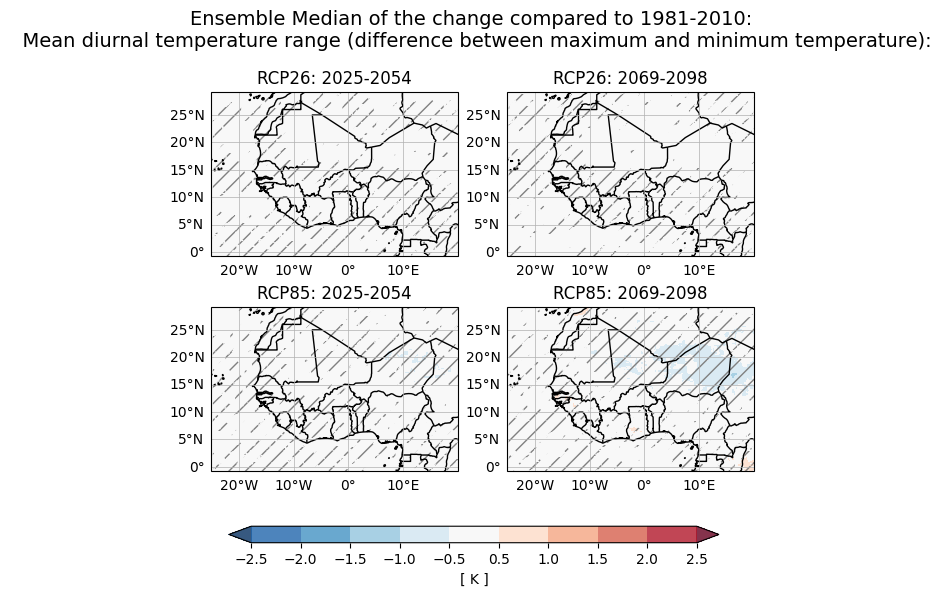

In [16]:
plot_4diff(
     sims_rcp26,
     sims_rcp85,
     robust_rcp26,
     robust_rcp85,
     level_steps_diff,
     color_steps_diff,
     what,
     robust,
     plotdir,
     title=title_part,
     var=var,
     robustness=True,
     #westafrica=False, 
     westafrica=True,
     user_dpi=300,
    )